#決定木

決定木は、与えられたデータに対して次々に条件を設け、木の枝のように段階的にターゲットを分類するアルゴリズムである。

決定木は**教師あり学習**のアルゴリズムの一つであり、以下のような特徴を持っている。

・分割の条件を可視化できる（解釈性に優れている）

・数値データの特徴量に対して、標準化等のスケーリングを行う必要がない

決定木は、以下のような形を取る。

<img src="https://drive.google.com/uc?id=1329uEtWdXnSYeESLLcE4N4TYxKalK1VV" 
width="70%" height="70%">

決定木の分岐を判定する部分を**ノード**と呼び、

各ノードと直接繋がっているノードの内、一つ上のノードは**親ノード**、

一つ下のノードは**子ノード**と呼ばれる。

また、決定木の中で最も上にあるノードを**ルートノード**（根ノード）、

決定木の末端にあるノードを**リーフノード**（葉ノード）と呼ぶ。


決定木は、以下のような形でターゲットを分類する。

<img src="https://datachemeng.com/wp-content/uploads/2017/07/SnapCrab_2017-7-17_14-20-13_No-00.png" 
alt="sample decision tree" width="50%" height="50%">


*   まず全てのデータをルートノードの条件で判定し、条件に従って左右の子ノードに分割する。

*   次にそれぞれの子ノードの条件で判定し、条件に従ってさらに左右の子ノードに分割する。

*   上記を繰り返しデータがリーフノードに到達したら、各リーフノードによって判定されるクラスにデータを分類する。

決定木で判定を行う方法自体は上記のとおりシンプルなものであるが、

決定木を基本構成要素とするランダムフォレストや勾配ブースティング等は、

Kaggleの機械学習コンペでもよく使用されており重要な手法の一つであると言える。


##１．決定木の形成アルゴリズム

決定木を形成するためのアルゴリズムにはCART、C4.5、ID3など様々なものが存在し、それぞれ特徴が異なる。

CART、C4.5、ID3を比較すると以下のようになる。

<center><img src="https://drive.google.com/uc?id=1GYeB6hEKnK5yOYkbbzQCUVnfcJnIb5Ny" width="70%" height="70%"></center>


表から読み取れるように、CARTはC4.5やID3と比較して特徴量として連続変数を扱うことが出来たり、

回帰問題も扱うことが出来るため、比較的使い勝手の良いアルゴリズムである。



またscikit-learnの決定木クラスでもCARTが用いられていることもあり、

この資料では決定木を形成するアルゴリズムとしてCART(Classification and Regression Tree)を説明する。

改めてCARTの特徴を挙げると、以下のとおりとなる。

*   二分木を生成するため、モデルの構造がシンプル

*   連続変数もそのまま特徴量として使うことが出来る

*   分類問題、回帰問題ともに扱うことが出来る

*   分割の際の指標として「ジニ不純度」を使用する

*   scikit-learnの決定木クラスで採用されており、実装が容易
   （scikit-learnでは、分類問題ではDecisionTreeClassifier、回帰問題ではDecisionTreeRegressorを使用）


### ジニ不純度(Gini Impurity)

まず、CARTを理解する上で重要となる、分割の際の指標「ジニ不純度」について説明する。

ジニ不純度は、あるノードに異なるクラスのデータが含まれる割合を数値化したものである。

**ジニ不純度が小さい**　⇒　1つのノードに含まれるデータの多くが同じクラスに属している

**ジニ不純度が大きい**　⇒　1つのノードに含まれるデータが複数のクラスに均等に属している

<img src="https://axa.biopapyrus.jp/media/decision-tree-impurity.png" 
alt="impurity" width="50%" height="50%">

決定木を構築する際は、各ノードでデータを分割した後、分割後のデータがなるべく１つのクラスに属しているのが望ましい。

つまり、決定木を構築する際はジニ不純度が小さい値となるように分割点を決定していく。




**ジニ不純度の計算方法**

あるノード$t$におけるジニ不純度$GINI(t)$は、クラスの個数が全部で$c$個であるとすると(1)式のように表される。

$$
    GINI(t) = 1 - \sum_{i=1}^c p(i | t)^2 \tag{1}
$$

この式で$p(i| t)$はノード$t$に属するデータのうちクラス$i$のデータの割合を示しており、

ノード$t$に属するデータの個数が$n$個、そのうちクラス$i$であるデータの個数が$n_{i}$個であるとすると、以下の式で求められる。

$$p(i| t) = \frac{n_{i}}n$$

この$p(i| t) $を全てのクラスについて計算し(1)式に代入することによって、ジニ不純度が求められる。

ジニ不純度が最大値を取るのは、全てのクラスが完全に均等に分布しているときであり、

最小値（０）を取るのは全てのデータが1つのクラスに属しているときである。

以下、最大値、最小値をとる$GINI$の値を計算する。

**最大値**

クラス数をcとすると、全てのクラスが均等に分布しているとき、$p(i| t)$は全てのクラスで$\frac{1}{c}$であるから、

$GINI$  $= 1 - (\frac{1}{c})^2 - (\frac{1}{c})^2 ... -(\frac{1}{c})^2 $

　　　　$= 1 - c \times (\frac{1}{c})^2 $

　　　　$= 1 - \frac{c}{c^2} $

　　　　$= 1 - \frac{1}{c} $ 

となる。すなわち、

クラス数が2のときは$GINI=1-\frac{1}{2} = 0.5$、

3のときは$GINI=1-\frac{1}{3} = 0.66...$、

4のときは$GINI=1-\frac{1}{4} = 0.75$

のように計算される。

**最小値**

ノード内に1つのクラスしか存在しない場合、$p(i| t)$は存在しているクラスのみ1、それ以外の全てのクラスで0となるから、

$GINI$  $= 1 - (1)^2 - (0)^2 ... -(0)^2 $

　　　　$= 1 - 1 $

　　　　$= 0 $

となる。

ジニ不純度を計算することにより、ノードごとにどれだけデータが同じクラスに属しているかが分かるようになった。

しかし、それだけでは分割によってどれだけうまくデータをクラス毎に分割できるようになっているかは数値化できていない。

例えば、クラス0が100個、クラス1が80個属するノードを分割する際、

「性別が男かどうか」または「身長が170cm以上かどうか」のどちらかの条件が使えるとする。

それぞれの条件で分割したときの子ノードのジニ不純度を求めると、下図のようになる。

<center><img src="https://drive.google.com/uc?id=1jGtB3wzrZ2zYe6aTlJnLP0LgNN0uiWLb" width="70%" height="70%"></center>

パターンA、Bとも、元々のジニ不純度である4.94よりも子ノードのジニ不純度が小さくなっているため、

元よりもうまく分割できるようになっていることは分かるが、

どちらがよりうまく分割できるようになっているかは判断が出来ない。

これを数値化し求める方法として、利得(Gain)を紹介する。

### 利得(Gain)


それを求めるために、上で説明したジニ不純度を使って求めた**利得(Gain)**というものが用いられる。

利得は、分割前のノードのジニ不純度の値と、分割後の子ノードのジニ不純度の加重平均の差によって決定され、以下の式で求められる。

ここで$D_p$は分割前のノード、 $ D_{left/right}$は分割後の子ノード(左右) 、

 $m_{left/right}$は分割後の子ノード（左右）に属するデータ数とする。

$$ Gain = GINI(D_p) - \frac{m_{\rm left}}{m}GINI(D_{left}) - \frac{m_{\rm right}}{m}GINI(D_{right}) \tag{2} $$ 

これを上の例で計算してみると、

パターンAでは

$Gain$  　$= 0.494 - (\frac{100}{180} \times 0.32 + \frac{80}{180} \times 0.375) $

　　　　$= 0.494 - (0.178 + .0.167) $

　　　　$= 0.494 - 0.345 $

　　　　$= 0.149 $ 

パターンBの場合、

$Gain$  　$= 0.494 - (\frac{80}{180} \times 0.218 + \frac{100}{180} \times 0.42) $

　　　　$= 0.494 - (0.097 + 0.233) $

　　　　$= 0.494 - 0.331 $

　　　　$= 0.163 $ 

得られた結果を比較するとパターンBの方が利得の値が大きいことが分かる。

利得の値が大きいということは、よりデータをクラスごとにうまく分けられるようになったということを示すため、

ここではパターンB（身長が170㎝以上かどうか）で分割するのが良さそうだと言える。

### 決定木の閾値

上の例ではパターンA、パターンBと特徴量ごとに利得を計算していたが、

パターンBの方は、条件に用いる身長の閾値を170cm以外にすると、結果も変わる可能性がある。

このように、条件に用いる特徴量が連続値や3つ以上のカテゴリ値が存在するカテゴリ変数の場合、

閾値が何通りも考えられるため、最も良い閾値が何かを決定するために以下のような方法で計算される。

*   全てのデータの「身長」が取り得る値を求める。

 {178.1, 183.2, 169.1, 155.6, 171.1, ... , 178.1} 

*   小さい順に並べ、重複がある場合は削除する。

 {155.6, 169.1, 171.1, 178.1, 183.2} 

*   隣り合うデータ同士の中間の値を求める。

 {162.4, 170.1, 174.6, 180.7}

*   求めた中間の値をそれぞれ閾値とし、分割したときの利得の値を求める。

上記の考えを適用すると、今回の例ではパターンBは

「身長が162.4cm以上かどうか」

「身長が170.1cm以上かどうか」

「身長が174.6cm以上かどうか」

「身長が180.7cm以上かどうか」

の4通りの条件に分けることができ、これらの条件を適用した中で、最も大きな利得になるものを選ぶことになる。

**閾値選択の計算量**

上記の方法では、データの個数がN個であるとすると、最大でN-1個の閾値が候補となるため、計算量が非常に多くなってしまう。

これを避けるため、最も利得の大きくなる閾値を選ぶのではなく、ランダムに選んでしまうという方法も用いられることがある。

ただしその場合、最も利得の値が大きくなる閾値を求める場合に比べ、決定木の最終的な予測精度は落ちることが多い。

scikit-learnの決定木クラスでは「splitter」というオプションで調整することが可能である。

"best"（全ての閾値の内、最も利得が大きくなる閾値を用いる）　または　"random"（閾値をランダムに選択する）

デフォルトは"best"。


**決定木形成の終了条件**

以下のいずれかの条件に当てはまった場合は決定木の形成が終了される。

*    全てのデータが完全に分類される（全リーフノードのジニ不純度の値が0になる）

*    決定木が指定した深さに達する（max_depth）

##２．決定木の実装

### データ準備

ここからは、実際に決定木を実装してみる。

今回は、勉強会の第4回「ニューラルネットワークを用いた分類」でも使用したIrisデータセットを使用する。

特徴量として、アヤメの「がく片の長さ」「がく片の幅」「花弁の長さ」「花弁の幅」といった特徴量が存在するが、

決定木を可視化する際に分かりやすくするため、今回は「花弁の長さ」「花弁の幅」のみを使用してトレーニングする。

まずは、データセットをダウンロードする。

In [0]:
from sklearn.datasets import load_iris

# irisデータセットのダウンロード
iris = load_iris()

# 花弁の長さ、花弁の幅のみを使用
X = iris.data[:, 2:]
y = iris.target

### 決定木のトレーニング

ダウンロードしたirisデータセットを使用して、簡単な決定木のトレーニング・可視化を行う。

ここでは、scikit-learnのDecisionTreeClassifierクラスを使用し、Irisデータセットのトレーニングを行う。

このクラスにおいて、トレーニング時に設定可能なハイパーパラメータが複数存在するため、チューニングを行って最適な値を探すことが多い。

しかしここでは、max_depthという「決定木の深さ」を決めるハイパーパラメータのみ設定する。

In [13]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# 決定木の定義。決定木の深さ（max_depth）は2とする。
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# 決定木をX,yでトレーニングする。
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

### 決定木の可視化

トレーニングが完了したところで、トレーニングした決定木を可視化してみる。

まずは、可視化のための設定を行う。

In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# グラフ描画のための設定
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


scikit-learnの export_graphviz() メソッドを使用することで、グラフ定義ファイルを作成することができる。

In [0]:
from sklearn.tree import export_graphviz
from IPython.display import Image

export_graphviz(
    tree_clf,                                 #グラフ化したいモデル
    out_file='iris_tree.dot',                 #作成するグラフ定義ファイルの名前
    feature_names=iris.feature_names[2:],     #特徴量の名前リスト
    class_names=iris.target_names,            #クラスの名前リスト
    rounded=True,                             #図示するノードボックスの角を丸めるかどうか。Trueで丸める。
    filled=True                               #ノードに多数派のclassを表示するかどうか。Trueで表示する。
)

pydotクラスを使用して、可視化する。

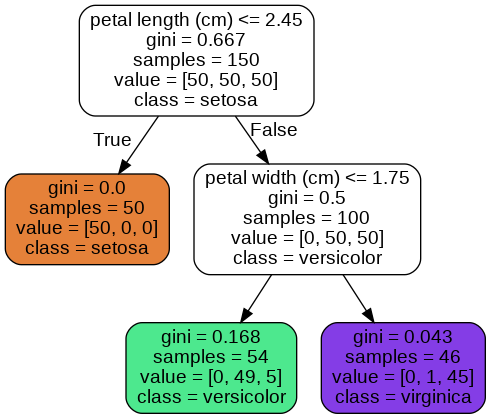

In [16]:
import pydot

# pydotを使用して、上記で定義したグラフ定義ファイルを使用したグラフオブジェクトを取得する。
(graph,) = pydot.graph_from_dot_file('iris_tree.dot')

# グラフを「iris_tree.png」に出力する。
graph.write_png('iris_tree.png')

# グラフを描画する
Image('iris_tree.png')

これが、今回トレーニングを行って生成された決定木を可視化したものである。

### 可視化した決定木の見方

上で可視化された決定木について、その見方を説明する。

<left><img src="https://drive.google.com/uc?id=17Q8Esaqd6dIRUekamnTnj4KQASCmQZW2" width="200" height="100"></left>

上から、

*   （リーフノード以外）分割に使われた条件（特徴量と閾値）

　※条件に当てはまる場合は子ノードの左、当てはまらない場合は右にデータが割り振られる。

*   ジニ不純度の値

*   該当ノードに属するデータの件数

*   クラス毎のデータの件数（クラス0、クラス1、クラス2、…）

*   該当ノードのデータのうち、最も件数の多いクラスの名前

　※リーフノードの場合、予測で該当ノードに振り分けられたデータは、ここに記載されたクラスとして予測される。
　　　　

### 決定木による決定境界

トレーニングした決定木の決定境界は、グラフ化することができる。

以下では、これまでトレーニングしてきた決定木をグラフ化する。

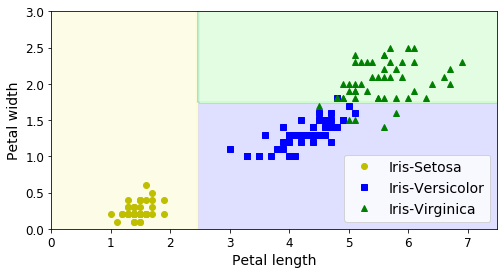

In [17]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3]):
    
    x1s = np.linspace(axes[0], axes[1], 100)      # axesの0要素、1要素目の間で等間隔に100データ作成
    x2s = np.linspace(axes[2], axes[3], 100)      # axesの2要素、3要素目の間で等間隔に100データ作成
    x1, x2 = np.meshgrid(x1s, x2s)                # x1s,x2sで格子点を作成する
    X_new = np.c_[x1.ravel(), x2.ravel()]         # 配列を結合する

    y_pred = clf.predict(X_new).reshape(x1.shape) # X_newを予測する
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
    plt.axis(axes)

    plt.xlabel("Petal length", fontsize=14)
    plt.ylabel("Petal width", fontsize=14)
    
    plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)

plt.show()

Petal length = 2.45の位置の境界線は、ルートノード(深さ0)によるものである。

この境界線の左側の領域（黄色背景）はSetosa種だけになっているため、これ以上分割は不要であることがわかる。

（実際にジニ不純度が0のため分割されていない）

一方で、境界線の右側は複数のクラスが混同しているため、さらにPetalwidth = 1.75の位置で分割されている。

この境界線の上下の領域を見ると、それぞれまだ異なるクラスに属するサンプルが残っているが、

max_depthが2に設定されているため、これ以上は分割されない。

より境界線を増やすためには、このmax_depthを大きくすれば良いことになる。

ただし、max_depthを大きくすることでトレーニングデータに過剰に適合する「過学習」が発生するリスクがあるため、注意が必要である。（詳しくは後述）

### クラスの確率の推計

決定木は、あるデータが特定のクラスに属する確率も推計できる。

これは、scikit-learnのモデルで共通して用いることの出来るpredict_probaメソッドによって算出される。

まず決定木は木構造をたどって当該データの属するリーフノードを見つけ、次にこのノードにあるクラスのトレーニングサンプルの割合を返す。

たとえば、花弁の長さが5cmで幅が1.5cmのあやめの種類を予測するとする。

決定木の条件から、このあやめは以下のリーフノードに属することになる。

<left><img src="https://drive.google.com/uc?id=1zH5cCaypLUV6KN7ngc31OvgiqoqglVhM" width="200" height="100"></left>

predict_probaは、このノードの個数の割合によって計算される。

すなわち、

セトナの確率0%(0/54)、

バーシクルの確率90.7%(49/54)

バージニカの確率9.3%(5/54)

が出力される。

実際にpredict_probaメソッドを用いると、以下のようになる。

In [18]:
test_iris = [[5,1.5]]
tree_clf.predict_proba(test_iris)

array([[0.        , 0.90740741, 0.09259259]])

分類の結果のみを返すには、同クラスのpredictを使用する。

このメソッドでは、確率が最も高いクラスのみを返す。

In [0]:
tree_clf.predict(test_iris)

array([1])

## ３．その他の不純度の指標

### エントロピー

CARTでは、通常不純度を求める指標としてジニ不純度が使われることはすでに説明した通りだが、

scikit-learnでは、ジニ不純度の代わりにエントロピーを使用することも出来る。

エントロピーを使用するには、criterionハイパーパラメータを"entropy"にする。

エントロピーの概念自体は、熱力学で分子の乱雑さの指標として使われたのが最初で、

熱力学では空間中の分子が静止して安定すると、エントロピーの値が0に近づく。

この考え方を情報理論に移し、機械学習ではエントロピーが不純度の指標として使われることがある。

あるノードにおいてデータが全て一つのクラスに属する場合、該当ノードにおけるエントロピーは0となる。

式(3)は、$i$番目のノードのエントロピーの定義を示している。

$$
    I_H(t) = - \sum_{i=1}^c p(i | t)log_2p(i | t) \tag{3}
$$

たとえば、上で可視化した決定木において、

背景緑色のノード（深さ2、左）のエントロピーを算出すると、以下の通りになる。

<h4>              エントロピー</h4>
        
　　$I_H = -(\frac{0}{54}log_2(\frac{0}{54})+\frac{49}{54}log_2(\frac{49}{54})+\frac{5}{54}log_2(\frac{5}{54})) \approx 0.445$


上で算出済であるが、同じノードにおけるジニ不純度は以下の通りである。

<h4>              ジニ不純度</h4>

　　$GINI = 1-(\frac{0}{54})^2-(\frac{49}{54})^2-(\frac{5}{54})^2 \approx 0.168$


エントロピーとジニ不純度によって、算出される値が変わっていることが分かる。

しかし、ジニ不純度とエントロピーの使用については、

ほとんどの場合どちらを使っても大きな差はなく、どちらを使っても似たような木になることが知られている。

ただし、計算量的にジニ不純度の方がわずかに高速であることもあり、デフォルトではジニ不純度が使用される。

エントロピーを不純度の指標として使用した決定木を算出してみる。

### エントロピーを使用した決定木

In [0]:
# 決定木の定義。決定木の深さ（max_depth）は2とする。
# criterionは'entropy'に設定する。
tree_clf_ent = DecisionTreeClassifier(max_depth=2, criterion='entropy', random_state=42)

# 決定木をX,yでトレーニングする。
tree_clf_ent.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [19]:
export_graphviz(
    tree_clf_ent,                             # グラフ化したいモデル
    out_file='iris_tree_ent.dot',             # 作成するグラフ定義ファイルの名前
    feature_names=iris.feature_names[2:],     # 特徴量の名前リスト
    class_names=iris.target_names,            # クラスの名前リスト
    rounded=True,                             # 図示するノードボックスの角を丸めるかどうか。Trueで丸める。
    filled=True                               # ノードに多数派のclassを表示するかどうか。Trueで表示する。
)
# pydotを使用して、上記で定義したグラフ定義ファイルを使用したグラフオブジェクトを取得する。
graph_ent, = pydot.graph_from_dot_file('iris_tree_ent.dot')

# グラフを「iris_tree.png」に出力する。
graph_ent.write_png('iris_tree_ent.png')

# グラフを描画する
Image('iris_tree_ent.png')

NameError: ignored

上図のとおり、ジニ不純度を選択した場合と木の形状は変わらず、

各ノードに表示される不純度の指標の値がginiからentropyに変わっているのみであることが確認できる。

## ４．決定木の剪定（過学習の抑制）

決定木は、木構造がトレーニングデータに合わせて調整されるため、

制約を設けなければトレーニングデータに密接に適合し、過学習に陥りやすい。

決定木では、この過学習を抑制するための方法として、剪定（pruning）と呼ばれるものがある。

ここからは剪定を行う過程の説明と、行わない場合との比較を行う。

*   剪定・・・樹木の枝を切る等、手入れを行うこと。決定木の枝を切る＝深さを制限する方法を現実世界の剪定になぞらえ、剪定という言葉が使われている。


### DecisionTreeClassifierクラスのハイパーパラメータ

DecisionTreeClassifierクラスは、決定木の形に制限を加える（剪定する）ための以下のパラメータが設定可能である。

<table >
    <tr>
      <th>ハイパーパラメータ</th>
      <th>パラメータの説明</th>
   </tr>
    <tr>
      <td>max_depth</td>
      <td>決定木の深さの上限を制限する</td>
   </tr>
    <tr>
      <td>min_samples_split</td>
      <td>ノードを分割するために必要なサンプル数の下限</td>
    </tr>
    <tr>
      <td>min_samples_leaf</td>
      <td>リーフノードが持たなければならないサンプル数の下限</td>
    </tr>
    <tr>
      <td>min_weight_fraction_leaf</td>
      <td>入力データにsample_weightsを与えた場合に使用する。リーフノードが持たなければならない重みの総和の下限</td>
    </tr>
    <tr>
      <td>max_leaf_nodes</td>
      <td>リーフノードの数の上限</td>
    </tr>
    <tr>
      <td>max_features</td>
      <td>各ノードで分割のために評価される特徴量の上限</td>
    </tr>
    <tr>
      <td>min_impurity_decrease</td>
      <td>ノードの分割後、この値以上不純度が減少する場合に分割する</td>
    </tr>
</table>



ここで、正則化の効果を確認するため、正則化のためのハイパーパラメータを設定した場合と、

そうではない場合での決定木の作られ方を比較する。

### 決定木の剪定（過学習の抑制）

ハイパーパラメータを全く設定せずにトレーニングした場合、過学習を起こしやすくなる。

以下では、それを確認してみる。

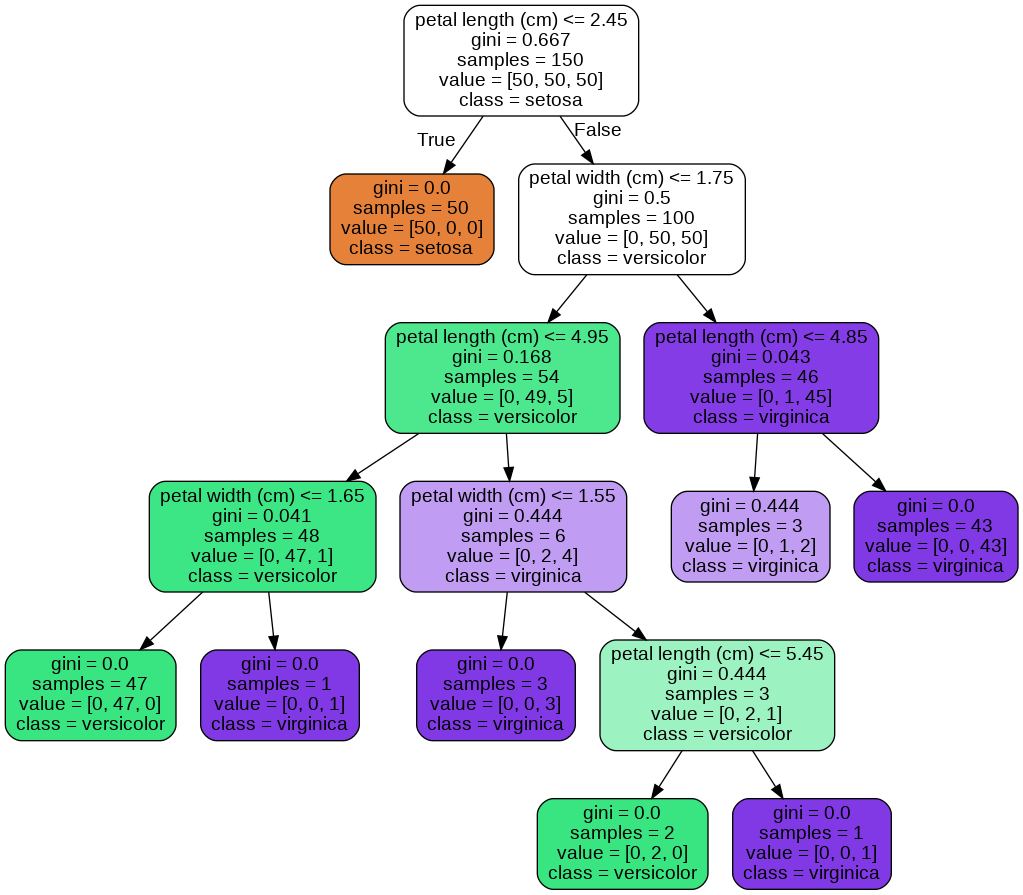

In [0]:
# 決定木の定義
tree_clf_deep = DecisionTreeClassifier(random_state=42)

# 決定木をX,yでトレーニング
tree_clf_deep.fit(X, y)

export_graphviz(
    tree_clf_deep,
    out_file='iris_tree_deep.dot',
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

# pydotを使用して、上記で定義したグラフ定義ファイルを使用したグラフオブジェクトを取得する。
(graph_deep,) = pydot.graph_from_dot_file('iris_tree_deep.dot')

# グラフを「iris_tree.png」に出力する。
graph_deep.write_png('iris_tree_deep.png')

# グラフを描画する
Image('iris_tree_deep.png')

### ハイパーパラメータにより正則化された決定木

一方、チューニングした場合の結果を確認する。

まずは、過去の講義（ML03_DeepNeauralNetwork）でも扱ったGridSearchCVにてチューニングを行う。

In [0]:
from sklearn.model_selection import GridSearchCV

# 調整するハイパーパラメータの候補
params = {
    'max_depth': range(1, 20),
    'min_samples_split': range(2, 50),
    'max_leaf_nodes': range(2, 20)
}

tree_clf_base = DecisionTreeClassifier(random_state=42)

# グリッドサーチCVの実行
gscv = GridSearchCV(
    estimator = tree_clf_base,
    param_grid = params, 
    cv = 10, 
    return_train_score=False,
    verbose=0
)
gscv.fit(X, y)

# 最善の結果が得られるハイパーパラメータの表示
gscv.best_params_

{'max_depth': 3, 'max_leaf_nodes': 4, 'min_samples_split': 2}

最高性能のモデルを取得し、可視化する。

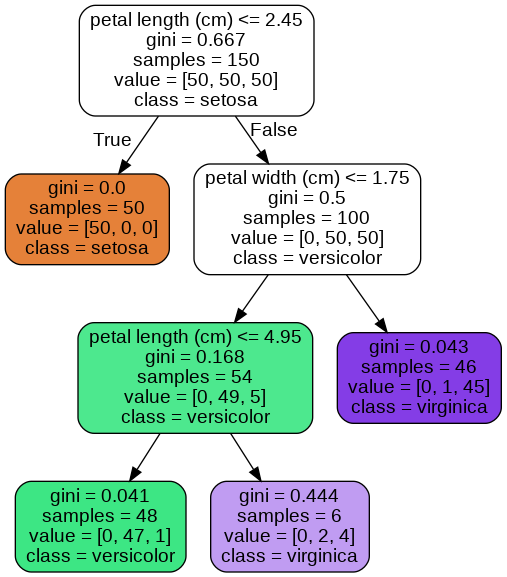

In [0]:
tree_clf_tuned = gscv.best_estimator_

export_graphviz(
    tree_clf_tuned,
    out_file='iris_tree_tuned.dot',
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

# pydotを使用して、上記で定義したグラフ定義ファイルを使用したグラフオブジェクトを取得する。
(graph_tuned,) = pydot.graph_from_dot_file('iris_tree_tuned.dot')

# グラフを「iris_tree_tuned.png」に出力する。
graph_tuned.write_png('iris_tree_tuned.png')

# グラフを描画する
Image('iris_tree_tuned.png')

最後にチューニングを行った決定木モデルと、行っていないモデルの決定境界を可視化すると、以下のようになる。

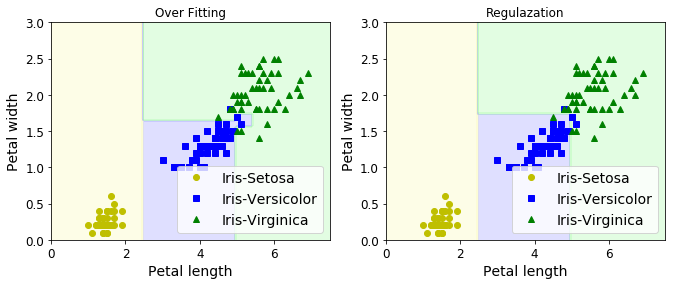

In [0]:
plt.figure(figsize=(11, 4))
plt.subplot(1,2,1)
plot_decision_boundary(tree_clf_deep, X, y)
plt.title("Over Fitting")

plt.subplot(1,2,2)
plot_decision_boundary(tree_clf_tuned, X, y)
plt.title("Regulazation")

plt.show()

左(OverFitting)がチューニングを行っていない場合、右(regulalization)がチューニングを行った場合の決定境界である。

これらを見ると、Over fittingの方では青の領域が緑の領域に食い込んでおり、よりトレーニングサンプルに適合していることが分かる。

一方、regulazationの方はより単純化され、必ずしもトレーニングサンプルに適合した状態とはならない。

こうすることによって、汎化性能を向上できるよう決定木を作成する。

## Appendix．回帰の場合

分類の場合は、不純度の指標としてジニ不純度、エントロピーが使用されるが、

回帰の場合は平均二乗誤差（MSE：Mean Squared Error）が用いられる。

$n_t$がノードtにおけるサンプルデータ数、

$y_i$がi番目のデータの値、$\hat{y_t}$がノードtにおける平均の値(=value)である。


$$
    I(t) =  \frac{1}{n_t}\sum_{i=1}^{n_t} (y_i - \hat{y_t})^2 \tag{4}
$$

この(4)式の値が小さいほどデータのばらつきが小さく、より値の近いデータが集まっていることとなる。

DecisionTreeRegressorクラスでトレーニングし、可視化すると下図のようになる。

![代替テキスト](https://cdn-ak.f.st-hatena.com/images/fotolife/o/ohke/20170720/20170720082249.png)

分類ではginiまたはentropyという変数が表示されていたが、回帰の場合はmseに変わっている。

またvalueの値は、分類では各クラスに属するサンプルの個数が表示されたのに対して、

回帰では該当クラスに属するトレーニングサンプルの平均の値となる。

